In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score,  confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.metrics import plot_precision_recall_curve # 자동화
from sklearn.metrics import precision_recall_curve      # detail 설정
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

# plot_precision_recall_curve(model, 문제지, 정답지)
# precision_recall_fscore_support()

In [3]:
df = pd.read_csv("../kaggle/pima/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
model = RandomForestClassifier(n_estimators=500,random_state=1414)  #0.7597402597402597
정답지 = df['Outcome']
문제지 = df.drop('Outcome', axis=1)

In [5]:
def my_eval(y_val, pred):  #avg='binary'
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    matrix = confusion_matrix(y_val, pred)
    print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f}\n 재현률:{recall:.4f} f1:{f1:.4f}')
    print("오차행렬\n",matrix)
    #cls_report = classification_report(y_val, pred)

In [6]:
def split_fit_score(문제지, 정답지, model=None, test_size=0.2):
        문제지8, 문제지2, 정답지8, 정답지2 = train_test_split(문제지, 정답지,test_size=test_size,random_state=1414,shuffle=False)
        model.fit(문제지8, 정답지8)
        컴퓨터답2 = model.predict(문제지2)

        # ndarray of shape (n_samples, n_classes)  150*3
        # [
        #     [0.4 0.6]  -- 1
        #     [0.7 0.3]  -- 0
        #     [0.42 0.58] - 1
        # ]
        proba = model.predict_proba(문제지2)
        my_eval(정답지2, 컴퓨터답2)   # def 연동

In [7]:
# 임계치 조정 하향 == 24(양성 틀린 수치를 줄여서) 양성 점수 상향
# 양성 학습 데이터 늘리기

# preprocessing(전처리) 에서 6개만 사용

# 인코딩 ; feature engine
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # pd.get_dummies()

# 스케일링 ; feature engine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 임계치 ; 튜닝, 검증 단계
from sklearn.preprocessing import Binarizer

# preprocessing은 모두 fit, transform이 있음
# binarize 이진화 ; 기준을 설정하고 대소를 대조하여 구분값 변환

data = [[0.7, 0.3], # 0 사망
        [0.4, 0.6], # 1 생존
        [0.8, 0.2]] # 0 사망

In [8]:
# encoding ; 글자 -> 숫자
# LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = ['a', 'b', 'b', 'c', 'd']

encoder = LabelEncoder() # 사전순으로 sort
encoder.fit(data)        # return self
encoder.transform(data)  # return arr

encoder.fit_transform(data)

array([0, 1, 1, 2, 3], dtype=int64)

In [9]:
# 특정 값으로 인코딩
mapping = {'a':1, 'b':0, 'c':2}
df = pd.DataFrame(data, columns=['name'])
df['name_bind'] = df['name'].map(mapping) # srs.map(dict)
df[['name', 'name_bind']]

,name,name_bind
0,a,1.0
1,b,0.0
2,b,0.0
3,c,2.0
4,d,NaN


In [10]:
train_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test_list  = [0, 1, 2, 3, 4, 5]
train_list = np.array(train_list).reshape(-1, 1)
test_list  = np.array(test_list).reshape(-1, 1)

# MinMaxScaler   ; 최솟값, 최댓값
# StandardScaler ; 평균 0, 편차 1
# RobustScaler   ; 중간값으로 맞춤, 쿼터

# 분류 중 tree 모델들은 스케일링의 영향을 덜 받음
# 회귀모델은 스케일링의 영향을 크게 받음

scaler = MinMaxScaler()     # param 미조정
scaler.fit(train_list)      # input arr, return self
st = scaler.transform(train_list) # return arr, apply fit
print(st)

# scaler.fit(test_list)     # y는 fit 금지
scaler.transform(test_list) # fit 없이 transform만

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]


array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

In [11]:
# th=2, P(1)=3, N=6
X = [[-1, 1, 0], # 0, 0, 0
     [ 1, 2, 3], # 0, 0, 1
     [ 2, 3, 4]] # 0, 1, 1

binz = Binarizer(threshold=2)

In [12]:
# th=3, P(1)=1, N=8
# 0, 0, 0
# 0, 0, 0
# 0, 0, 1
binz = Binarizer(threshold=3)
X_arr = binz.fit_transform(X)
X_arr = Binarizer(threshold=3).fit_transform(X)
X_arr

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [13]:
# th=1, P(1)=5, N=4
# 0, 0, 0
# 0, 1, 1
# 1, 1, 1
binz = Binarizer(threshold=1)
# biz.fit()
# biz.transform()
X_arr = binz.fit_transform(X) # return arr
X_arr # return arr

array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [14]:
# 기본 th=0.5, predict
# 조정 th=0.2, predict_proba & Binarizer

In [15]:
# 일반적으로 th를 내려야 점수가 좋아짐
# 왜냐하면 P가 많아지기 때문
# 원래 데이터는 P가 적기 때문에
# 데이터 양을 늘리는 것을 오버샘플링이라 함.
# 우리는 데이터양을 조정하는 것이 아니라, N/P의 기준점을 조정하여 N/P비율 바꿈
# 임계치, 임계점, threshold = N/P을 나누는 기준 확률점

# f1은 recall, prec 의 접점 근처에서 가장 점수가 좋음. 접점 자체는 아님

In [16]:
df = pd.read_csv("../kaggle/pima/diabetes.csv")
정답지 = df['Outcome']
문제지 = df.drop('Outcome', axis=1)

In [17]:
def my_eval(y_val, pred, proba, th):  #avg='binary'
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    matrix = confusion_matrix(y_val, pred)
    print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f}\n 재현률:{recall:.4f} f1:{f1:.4f}')
    print("오차행렬\n",matrix)
    #cls_report = classification_report(y_val, pred)

    # plot_precision_recall_curve(model, 문제지2, 정답지2)
    precisions, recalls, ths = precision_recall_curve(y_val, proba[:, 1])
    plt.title('precision recall th {} f1 {} curve'.format(th, f1))
    plt.xlabel('threshold')
    plt.ylabel('value')
    plt.grid()
    plt.plot(ths, precisions[:ths.shape[0]], linestyle='--', label='precision')
    plt.plot(ths, recalls[:ths.shape[0]], label='recall')
    # plt.plot(ths, f1, label='f1')
    plt.legend()
    plt.show()

In [25]:
# bin 위치

from sklearn.metrics import precision_recall_fscore_support, plot_precision_recall_curve

def split_fit_score(문제지, 정답지, model=None, test_size=0.2):

    문제지8, 문제지2, 정답지8, 정답지2 = train_test_split(문제지, 정답지,test_size=test_size,random_state=1414,shuffle=False)

    model.fit(문제지8, 정답지8)
    컴퓨터답2 = model.predict(문제지2) # 0.5 이하는 0, 0.5 초과는 1로 처리

    # ndarray of shape (n_samples, n_classes)  150[# ndarray of shape (n_samples, n_classes)  150*3*3
    # [
    #     [0.4 0.6]  -- 1
    #     [0.7 0.3]  -- 0
    #     [0.42 0.58] - 1
    # ]

    proba = model.predict_proba(문제지2) # P/N 확률 예측, 내부적으로 확률을 계산하여 predict하는 것
    # print(proba[:5])

    proba_positive = proba[:, 1].reshape(-1, 1)

    th_list = [0, .2, .25, .3, .35, .4, .45, 1]
    for th in th_list:
        """루프로 적절한 th 찾기"""
        binz = Binarizer(threshold=th)   # P가 될 확률의 값을 조정
        res = binz.fit_transform(proba_positive)  # [:,1]과 th를 비교해서 적용, 
        # print(res[:5])
        print('-' * 20,'threshold = ', th)
        print(type(res))
        print(res)
        my_eval(정답지2, res, proba, th)   # def 연동

    auc_score = roc_auc_score(정답지2, proba[:, 1])

    # plot_roc_curve(model, 문제지2, 정답지2)
    fprs, tprs, ths = roc_curve(정답지2, proba[:, 1])
    plt.title('roc auc curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.grid()
    plt.plot(fprs, tprs, label='roc')
    plt.plot([0, 1], [0, 1], label='50%')
    plt.legend()
    plt.show()

-------------------- threshold =  0
<class 'numpy.ndarray'>
(154, 1)
정확도0.3701 정밀도:0.3618
 재현률:1.0000 f1:0.5314
오차행렬
 [[ 2 97]
 [ 0 55]]


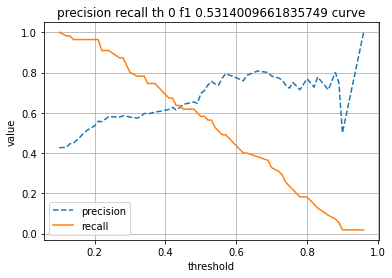

-------------------- threshold =  0.2
<class 'numpy.ndarray'>
(154, 1)
정확도0.7143 정밀도:0.5579
 재현률:0.9636 f1:0.7067
오차행렬
 [[57 42]
 [ 2 53]]


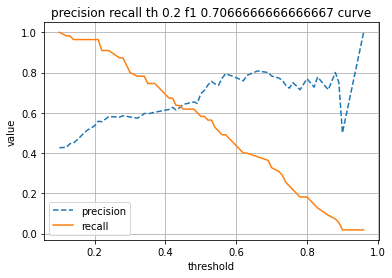

-------------------- threshold =  0.25
<class 'numpy.ndarray'>
(154, 1)
정확도0.7273 정밀도:0.5783
 재현률:0.8727 f1:0.6957
오차행렬
 [[64 35]
 [ 7 48]]


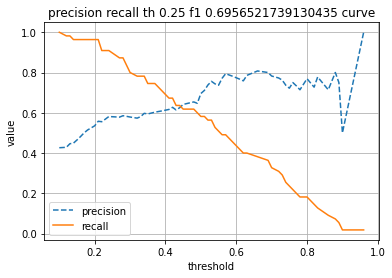

-------------------- threshold =  0.3
<class 'numpy.ndarray'>
(154, 1)
정확도0.7143 정밀도:0.5733
 재현률:0.7818 f1:0.6615
오차행렬
 [[67 32]
 [12 43]]


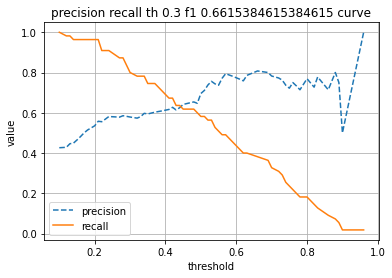

-------------------- threshold =  0.35
<class 'numpy.ndarray'>
(154, 1)
정확도0.7338 정밀도:0.6029
 재현률:0.7455 f1:0.6667
오차행렬
 [[72 27]
 [14 41]]


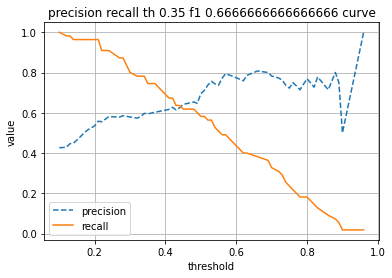

-------------------- threshold =  0.4
<class 'numpy.ndarray'>
(154, 1)
정확도0.7338 정밀도:0.6167
 재현률:0.6727 f1:0.6435
오차행렬
 [[76 23]
 [18 37]]


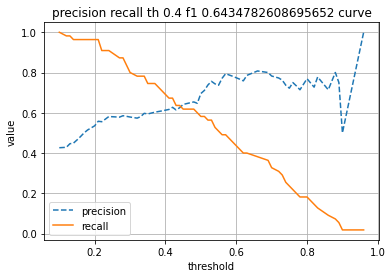

-------------------- threshold =  0.45
<class 'numpy.ndarray'>
(154, 1)
정확도0.7468 정밀도:0.6538
 재현률:0.6182 f1:0.6355
오차행렬
 [[81 18]
 [21 34]]


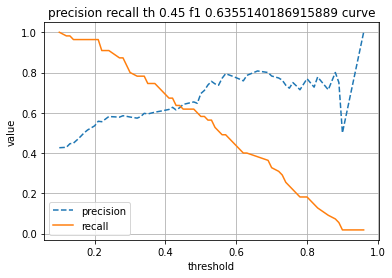

-------------------- threshold =  1
<class 'numpy.ndarray'>
(154, 1)
정확도0.6429 정밀도:0.0000
 재현률:0.0000 f1:0.0000
오차행렬
 [[99  0]
 [55  0]]


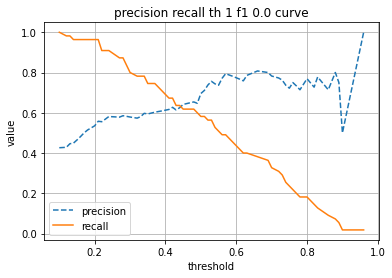

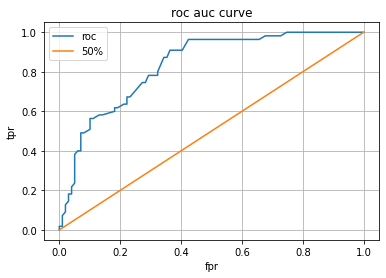

In [24]:
model = RandomForestClassifier()
split_fit_score(문제지, 정답지, model)

# th를 올릴수록 f1 낮아짐
# 정밀도, 재현율(중심)도 확인